First Problem: calculatiing constants

Import and define syms

In [2]:
import sympy
sympy.init_printing()

u_max, u_star, rho_max, rho_star, A, B = sympy.symbols('u_max u_star rho_max rho_star A B')

Set up Equations

In [9]:
eq1 = sympy.Eq( 0, u_max*rho_max*(1 - A*rho_max-B*rho_max**2) )
eq2 = sympy.Eq( 0, u_max*(1 - 2*A*rho_star-3*B*rho_star**2) )
eq3 = sympy.Eq( u_star, u_max*(1 - A*rho_star - B*rho_star**2) )
eq4 = sympy.Eq(eq2.lhs - 3*eq3.lhs, eq2.rhs - 3*eq3.rhs)
rho_sol = sympy.solve(eq4,rho_star)[0]
B_sol = sympy.solve(eq1,B)[0]
quadA = eq2.subs([(rho_star, rho_sol), (B,B_sol)])
A_sol = sympy.solve(quadA, A)

Solve, A_sol[0] was a negative take A_sol[1]

In [14]:
aval = A_sol[1].evalf(subs={u_star: 1.5, u_max:2.0, rho_max:15.0} )
aval

Solve B

In [13]:
bval = B_sol.evalf(subs={rho_max:15.0, A:aval} )
bval

Sod's Shock Tube 

import

In [66]:
%matplotlib inline
import numpy 
from matplotlib import pyplot
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

Parameters

In [113]:
nx = 81
dx = .25
dt = .0002   
gamma = 1.4
t0=0
tmax = .01

nt = int(tmax/dt)

In [68]:
x = numpy.linspace(-10,10,nx)

In [69]:
u = numpy.empty((nx,3))
f = numpy.empty((nx,3))

Initial Conditions

In [70]:
u[0:40,0] = 1.
u[40:81,0] = .125
u[:,1] = 0.
u[0:40,2] = 100
u[40:81,2] = 10

Sanity Checks

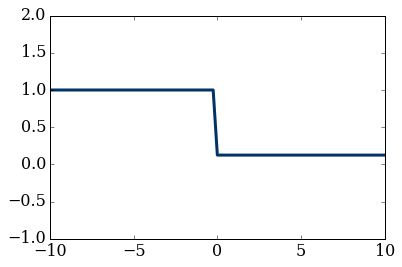

In [42]:
pyplot.plot(x, u[:,0], color='#003366', ls='-', lw=3)
pyplot.ylim(-1,2);

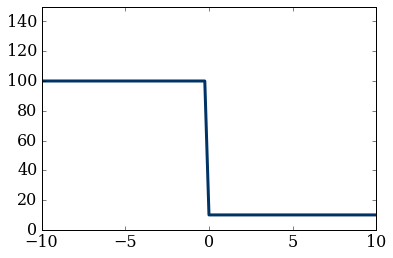

In [44]:
pyplot.plot(x, u[:,2], color='#003366', ls='-', lw=3)
pyplot.ylim(0,150);

Define Function for Flux 

In [103]:
def flux(u,f,gamma):
    f[:,0] = u[:,1]
    f[:,1] = u[:,1]**2/u[:,0] + (gamma-1)*(u[:,2] - 0.5*u[:,1]**2/u[:,0])
    f[:,2] = (u[:,2] + (gamma-1) *(u[:,2] - 0.5 * (u[:,1]**2 /u[:,0] ) ))* u[:,1]/u[:,0]
    return f

In [ ]:
Sanity Checks

In [104]:
ftest = flux(u,f,gamma)

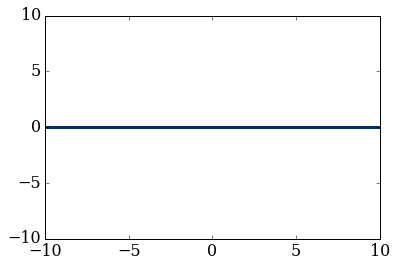

In [105]:
pyplot.plot(x, ftest[:,0], color='#003366', ls='-', lw=3)
pyplot.ylim(-10,10);

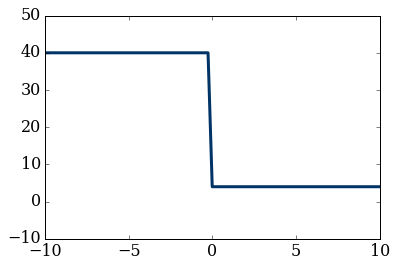

In [109]:
pyplot.plot(x, ftest[:,1], color='#003366', ls='-', lw=3)
pyplot.ylim(-10,50);

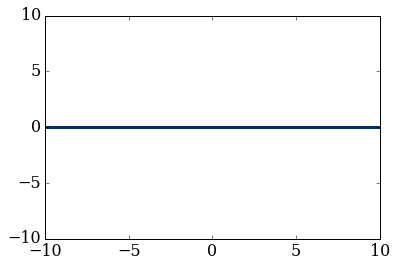

In [111]:
pyplot.plot(x, ftest[:,2], color='#003366', ls='-', lw=3)
pyplot.ylim(-10,10);

Define Richtmyer method


In [173]:
def richtmyer(u,f,dt,nt,dx,gamma):
    
    u_n = numpy.zeros((len(u),3))
    u_star = numpy.empty_like(u)
    u_n[:,:] = u.copy()
    u_star[:,:] = u.copy()
    t = 0
    
    for i in range(1,nt+1):
        t = t + dt
        f = flux(u, f, gamma)
        u_star[:-1,:] = 0.5*(u[1:,:] + u[:-1,:]) - dt/(2*dx) * (f[1:,:] - f[:-1,:])
        fstar = flux(u_star, f, gamma)
        u_n[:-1,:] = u[:-1,:] - dt/dx * (fstar[1:,:] - fstar[:-1,:])
        f = flux(u_n, f, gamma)
    u = u_n.copy()
    f = f.copy()    
    return u

In [174]:
richtmyer(u,f,dt,nt,dx,gamma)

array([[  1.00000000e+00,   0.00000000e+00,   1.00000000e+02],
       [  1.00000000e+00,   0.00000000e+00,   1.00000000e+02],
       [  1.00000000e+00,   0.00000000e+00,   1.00000000e+02],
       [  1.00000000e+00,   0.00000000e+00,   1.00000000e+02],
       [  1.00000000e+00,   0.00000000e+00,   1.00000000e+02],
       [  1.00000000e+00,   0.00000000e+00,   1.00000000e+02],
       [  1.00000000e+00,   0.00000000e+00,   1.00000000e+02],
       [  1.00000000e+00,   0.00000000e+00,   1.00000000e+02],
       [  1.00000000e+00,   0.00000000e+00,   1.00000000e+02],
       [  1.00000000e+00,   0.00000000e+00,   1.00000000e+02],
       [  1.00000000e+00,   0.00000000e+00,   1.00000000e+02],
       [  1.00000000e+00,   0.00000000e+00,   1.00000000e+02],
       [  1.00000000e+00,   0.00000000e+00,   1.00000000e+02],
       [  1.00000000e+00,   0.00000000e+00,   1.00000000e+02],
       [  1.00000000e+00,   0.00000000e+00,   1.00000000e+02],
       [  1.00000000e+00,   0.00000000e+00,   1.0000000

In [131]:
u_star = numpy.empty_like(u)

In [133]:
numpy.shape(u_star)